# Final PIT - Datamining

__Lariosa, Gerald Darwin D.__

__Malacaste, Febby__

# AFFINITY ANALYSIS - MANUAL

### Downloading the Dataset from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("heeraldedhia/groceries-dataset")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 257k/257k [00:00<00:00, 362kB/s]

Extracting files...
Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\heeraldedhia\groceries-dataset\versions\1


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

### Loading The Dataset

In [2]:
dataset = r"C:\Users\user\.cache\kagglehub\datasets\heeraldedhia\groceries-dataset\versions\1\Groceries_dataset.csv"

In [3]:
df = pd.read_csv(dataset)
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


### Visualizing Items Bought by the Same Member on the Same Date

In [5]:
visualize = df

# Extract unique Dates from the dataset
unique_date = df['Date'].unique().tolist()

# Filter the dataframe for rows that match the selected 'unique_date'
filtered_data = visualize[visualize['Date'] == unique_date[0]]

# Extract unique member numbers from the filtered data
filtered_data_unique_member = filtered_data['Member_number'].unique().tolist()

# Filter the data again based on the first unique member number
filtered_data = filtered_data[filtered_data['Member_number'] == filtered_data_unique_member[0]]

In [6]:
filtered_data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
16149,1808,21-07-2015,rolls/buns
36088,1808,21-07-2015,candy


### Initializing a new Dataframe for Storing data For Preprocessing

__The Columns Are the Unique classes in column 'itemDescription'__

In [7]:
unique_items = df['itemDescription'].unique().tolist()

In [8]:
data = pd.DataFrame(columns=unique_items)

data

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products


### Filling the Initialized Dataset, where each row contains items bought by a specific member on a specific date


__1 means the column name/item was bought, 0 means the column name/item was'nt bought__

In [9]:

for i in range(len(unique_date)):
    filtered_data_date = df[df['Date'] == unique_date[i]]
    filtered_data_unique_member = filtered_data_date['Member_number'].unique().tolist()
    for j in range(len(filtered_data_unique_member)):
        filtered_data_member = filtered_data_date[filtered_data_date['Member_number'] == filtered_data_unique_member[j]]
        get_item = filtered_data_member['itemDescription'].unique().tolist()
        new_row = [0] * len(unique_items)  # Default values
        data.loc[len(data)] = new_row 
        for k in range(len(get_item)):
            data.loc[len(data)-1, get_item[k]] = 1

        print(f'Row {len(data)-1} [On {unique_date[i]} Member # {filtered_data_unique_member[j]} bought: {", ".join(data.columns[data.iloc[len(data)-1] == 1])}]')
                    

Row 0 [On 21-07-2015 Member # 1808 bought: tropical fruit, rolls/buns, candy]
Row 1 [On 21-07-2015 Member # 1997 bought: frankfurter, brown bread, canned beer, soda, white bread]
Row 2 [On 21-07-2015 Member # 4736 bought: other vegetables, butter, yogurt, soda, UHT-milk]
Row 3 [On 21-07-2015 Member # 3812 bought: sausage]
Row 4 [On 21-07-2015 Member # 4429 bought: rolls/buns, pot plants, grapes]
Row 5 [On 21-07-2015 Member # 2769 bought: canned beer, sparkling wine]
Row 6 [On 21-07-2015 Member # 3585 bought: other vegetables, citrus fruit]
Row 7 [On 21-07-2015 Member # 3128 bought: bottled water, newspapers, dessert]
Row 8 [On 21-07-2015 Member # 3814 bought: whole milk, citrus fruit, chicken, canned beer, white wine, UHT-milk, shopping bags, hygiene articles, napkins]
Row 9 [On 21-07-2015 Member # 1553 bought: other vegetables, sliced cheese]
Row 10 [On 21-07-2015 Member # 3318 bought: other vegetables, curd]
Row 11 [On 21-07-2015 Member # 1345 bought: frankfurter, soda, grapes, salt,

### Sorting the Rows From the Most Significant Transactions (with the Most 1s) to the Least

In [10]:
from IPython.display import display
# Calculate the sum of each row
row_sums = data.sum(axis=1)

# Sort the rows by the sum in descending order
sorted_data = data.loc[row_sums.sort_values(ascending=False).index]

# Display the rows with the most ones
display(sorted_data)


,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
3272,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1083,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4842,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4634,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4719,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Selecting the Top 500 Rows with Significant Transactions

In [11]:
data = sorted_data.head(500)
data

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
3272,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1083,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4842,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6597,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3473,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6540,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Removing Empty Columns/Items That No One Bought

In [12]:
# Drop columns where all values are 0
data = data.loc[:, (data != 0).any(axis=0)]

# Display the modified DataFrame
display(data)

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,softener,cake bar,honey,jam,flower (seeds),rice,tea,pudding powder,ready soups,make up remover
3272,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1083,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4842,0,0,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6597,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3473,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6540,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Bar Chart of the Top 20 Frequent Items After Data Preprocessing

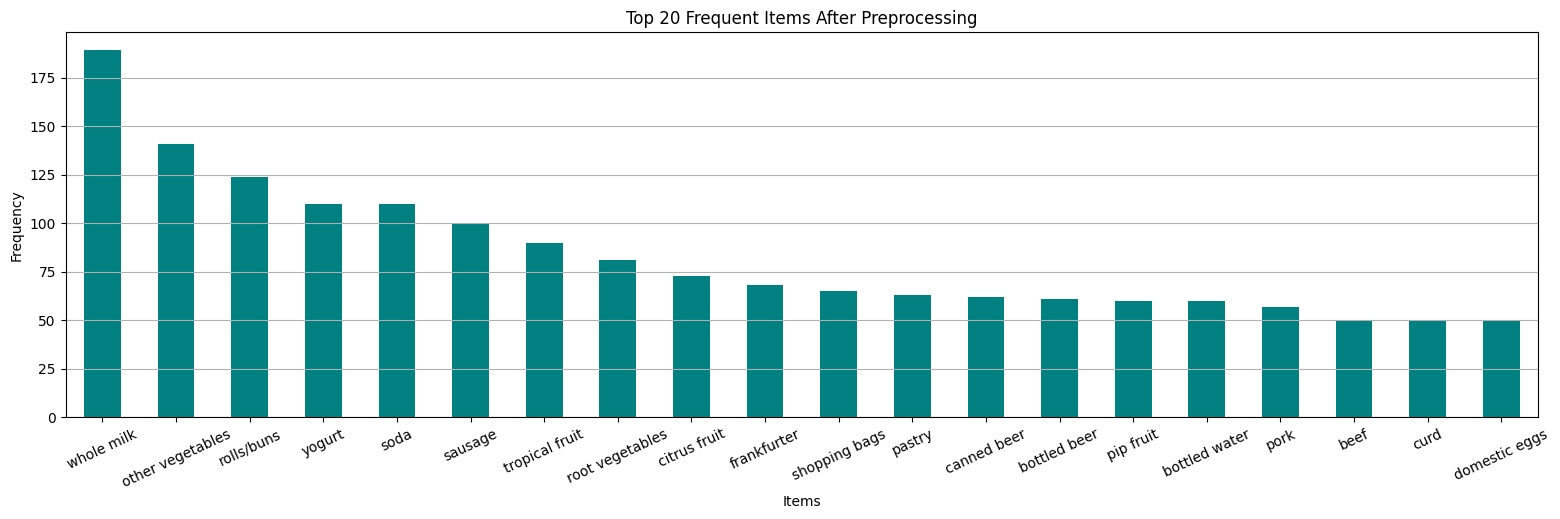

In [13]:
import matplotlib.pyplot as plt

top_n = 20
# Summing the binary values for each item (i.e., counting the frequency of each item)
# Sorting the items by their frequencies and selecting the top `top_n` items
item_frequencies = data.sum(axis=0).sort_values(ascending=False).head(top_n)

# Plotting the frequencies of the top `top_n` items as a bar chart
item_frequencies.plot(kind='bar', color='teal', figsize=(19, 5))
plt.title(f'Top {top_n} Frequent Items After Preprocessing')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.xticks(rotation=25)
plt.show()

### Feature/Column Names After Removing the Empty Columns

In [14]:
features = data.columns.tolist()
features

['tropical fruit',
 'whole milk',
 'pip fruit',
 'other vegetables',
 'rolls/buns',
 'pot plants',
 'citrus fruit',
 'beef',
 'frankfurter',
 'chicken',
 'butter',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'butter milk',
 'bottled water',
 'yogurt',
 'sausage',
 'brown bread',
 'hamburger meat',
 'root vegetables',
 'pork',
 'pastry',
 'canned beer',
 'berries',
 'coffee',
 'misc. beverages',
 'ham',
 'turkey',
 'curd cheese',
 'red/blush wine',
 'frozen potato products',
 'flour',
 'sugar',
 'frozen meals',
 'herbs',
 'soda',
 'detergent',
 'grapes',
 'processed cheese',
 'fish',
 'sparkling wine',
 'newspapers',
 'curd',
 'pasta',
 'popcorn',
 'finished products',
 'beverages',
 'bottled beer',
 'dessert',
 'dog food',
 'specialty chocolate',
 'condensed milk',
 'cleaner',
 'white wine',
 'meat',
 'ice cream',
 'hard cheese',
 'cream cheese ',
 'liquor',
 'pickled vegetables',
 'liquor (appetizer)',
 'UHT-milk',
 'candy',
 'onions',
 'ph

### Unpacking the data

In [15]:
n_samples, n_features = data.shape

### Calculating Support, Confidence, and Lift for Association Rules

In [ ]:
__Threshold: Support= .7%, Confidence= 35%__

In [16]:
from collections import defaultdict

# Initialize data structures
valid_rules = defaultdict(int)
invalid_rules = defaultdict(int)
num_occurences = defaultdict(int)
lift = defaultdict(float)

# Loop through the transactions
for item in data.values:
    for premise in range(n_features):
        if item[premise] == 0: 
            continue

        # Record that the premise was bought in another transaction
        num_occurences[premise] += 1 
        for conclusion in range(n_features):
            if premise == conclusion:
                continue

            if item[conclusion] == 1:
                valid_rules[(premise, conclusion)] += 1
            else:
                invalid_rules[(premise, conclusion)] += 1
    

# Initialize filtered support and confidence dictionaries
filtered_support = defaultdict(float)
filtered_confidence = defaultdict(float)

for premise, conclusion in valid_rules.keys():
    # Calculate raw support and confidence
    raw_support = valid_rules[(premise, conclusion)] / n_samples
    raw_confidence = (valid_rules[(premise, conclusion)] / num_occurences[premise]) * 100

    # Apply threshold filters
    if raw_support < 0.007 or raw_confidence < 35:
        print(f"Skipping {features[premise]} -> {features[conclusion]} as support and confidence didn't reach the threshold.\n")
        continue

    # Add to filtered dictionaries if thresholds are met
    filtered_support[(premise, conclusion)] = round(raw_support * 100, 2)
    filtered_confidence[(premise, conclusion)] = round(raw_confidence, 2)

    # Calculate Lift
    support_premise = round((num_occurences[premise] / n_samples), 2)
    support_conclusion = round((num_occurences[conclusion] / n_samples), 2)
    
    lift[(premise, conclusion)] = round((filtered_support[(premise, conclusion)] / 100) / (support_premise * support_conclusion), 3)

Skipping pip fruit -> other vegetables as support and confidence didn't reach the threshold.

Skipping pip fruit -> rolls/buns as support and confidence didn't reach the threshold.

Skipping pip fruit -> specialty bar as support and confidence didn't reach the threshold.

Skipping pip fruit -> yogurt as support and confidence didn't reach the threshold.

Skipping pip fruit -> sausage as support and confidence didn't reach the threshold.

Skipping pip fruit -> newspapers as support and confidence didn't reach the threshold.

Skipping pip fruit -> curd as support and confidence didn't reach the threshold.

Skipping pip fruit -> beverages as support and confidence didn't reach the threshold.

Skipping pip fruit -> soft cheese as support and confidence didn't reach the threshold.

Skipping other vegetables -> pip fruit as support and confidence didn't reach the threshold.

Skipping other vegetables -> rolls/buns as support and confidence didn't reach the threshold.

Skipping other vegetabl

### Displaying the Rules and Results (Support, Confidence, and Lift)

In [17]:
for premise, conclusion in filtered_confidence:
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print(f"Rule: If a person buys {premise_name} they will also buy {conclusion_name}")
    print(f"    - Confidence: {filtered_confidence[(premise, conclusion)]}%")
    print(f"    - Support: {filtered_support[(premise, conclusion)]}%")
    print(f"    - Lift: {lift[(premise, conclusion)]}")

    print()

Rule: If a person buys other vegetables they will also buy whole milk
    - Confidence: 35.46%
    - Support: 10.0%
    - Lift: 0.94

Rule: If a person buys yogurt they will also buy whole milk
    - Confidence: 40.91%
    - Support: 9.0%
    - Lift: 1.077

Rule: If a person buys sausage they will also buy whole milk
    - Confidence: 38.0%
    - Support: 7.6%
    - Lift: 1.0

Rule: If a person buys frozen meals they will also buy other vegetables
    - Confidence: 39.13%
    - Support: 1.8%
    - Lift: 1.286

Rule: If a person buys cat food they will also buy whole milk
    - Confidence: 50.0%
    - Support: 1.2%
    - Lift: 1.579

Rule: If a person buys sugar they will also buy whole milk
    - Confidence: 39.13%
    - Support: 1.8%
    - Lift: 0.947

Rule: If a person buys ice cream they will also buy pip fruit
    - Confidence: 45.45%
    - Support: 1.0%
    - Lift: 4.167

Rule: If a person buys ice cream they will also buy other vegetables
    - Confidence: 36.36%
    - Support: 0

### Function to Print The Rules and Results (Support, Confidence, and Lift)

In [51]:
def print_rule(premise, conclusion, support, confidence, features):
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.2f}%".format(confidence[(premise, conclusion)]))
    print(" - Support: {0}%".format(support[(premise, conclusion)]))
    print(" - Lift: {0}".format(lift[(premise, conclusion)]))
    print("")

#### Displaying the Filtered Support Values

In [52]:
from pprint import pprint
pprint(list(filtered_support.items()))

[((3, 1), 10.0),
 ((17, 1), 9.0),
 ((18, 1), 7.6),
 ((35, 3), 1.8),
 ((99, 1), 1.2),
 ((34, 1), 1.8),
 ((57, 2), 1.0),
 ((57, 3), 0.8),
 ((57, 4), 1.0),
 ((143, 17), 1.0),
 ((6, 1), 5.4),
 ((9, 1), 3.2),
 ((55, 1), 1.2),
 ((63, 1), 2.0),
 ((91, 1), 2.0),
 ((28, 1), 3.2),
 ((65, 1), 2.2),
 ((65, 17), 1.8),
 ((51, 17), 0.8),
 ((78, 1), 2.4),
 ((87, 1), 1.2),
 ((37, 1), 8.2),
 ((67, 1), 3.8),
 ((23, 1), 5.2),
 ((38, 1), 1.0),
 ((61, 4), 0.8),
 ((4, 1), 9.2),
 ((25, 1), 2.2),
 ((74, 1), 1.4),
 ((90, 1), 0.8),
 ((102, 4), 0.8),
 ((52, 6), 1.6),
 ((81, 3), 2.4),
 ((33, 1), 1.6),
 ((143, 44), 0.8),
 ((56, 3), 2.0),
 ((142, 1), 0.8),
 ((103, 1), 0.8),
 ((114, 2), 1.0),
 ((50, 1), 1.6),
 ((20, 1), 2.2),
 ((39, 3), 1.8),
 ((71, 1), 1.8),
 ((71, 3), 1.6),
 ((71, 4), 1.6),
 ((80, 1), 1.0),
 ((96, 1), 0.8),
 ((47, 1), 1.0),
 ((95, 1), 1.8),
 ((95, 18), 1.6),
 ((40, 7), 1.2),
 ((55, 37), 1.2),
 ((16, 1), 4.2),
 ((64, 1), 1.2),
 ((59, 3), 2.2),
 ((36, 17), 1.0),
 ((121, 1), 1.8),
 ((140, 17), 0.8),
 

#### Displaying the Filtered Confidence Values

In [53]:
pprint(list(filtered_confidence.items()))

[((3, 1), 35.46),
 ((17, 1), 40.91),
 ((18, 1), 38.0),
 ((35, 3), 39.13),
 ((99, 1), 50.0),
 ((34, 1), 39.13),
 ((57, 2), 45.45),
 ((57, 3), 36.36),
 ((57, 4), 45.45),
 ((143, 17), 50.0),
 ((6, 1), 36.99),
 ((9, 1), 38.1),
 ((55, 1), 37.5),
 ((63, 1), 35.71),
 ((91, 1), 47.62),
 ((28, 1), 57.14),
 ((65, 1), 50.0),
 ((65, 17), 40.91),
 ((51, 17), 40.0),
 ((78, 1), 50.0),
 ((87, 1), 60.0),
 ((37, 1), 37.27),
 ((67, 1), 38.0),
 ((23, 1), 41.27),
 ((38, 1), 35.71),
 ((61, 4), 66.67),
 ((4, 1), 37.1),
 ((25, 1), 39.29),
 ((74, 1), 35.0),
 ((90, 1), 50.0),
 ((102, 4), 57.14),
 ((52, 6), 36.36),
 ((81, 3), 36.36),
 ((33, 1), 61.54),
 ((143, 44), 40.0),
 ((56, 3), 50.0),
 ((142, 1), 100.0),
 ((103, 1), 57.14),
 ((114, 2), 38.46),
 ((50, 1), 36.36),
 ((20, 1), 37.93),
 ((39, 3), 39.13),
 ((71, 1), 45.0),
 ((71, 3), 40.0),
 ((71, 4), 40.0),
 ((80, 1), 71.43),
 ((96, 1), 44.44),
 ((47, 1), 50.0),
 ((95, 1), 42.86),
 ((95, 18), 38.1),
 ((40, 7), 46.15),
 ((55, 37), 37.5),
 ((16, 1), 35.0),
 ((64, 

### Sorting dictionary's items (Support) in descending order based on their values

In [54]:
from operator import itemgetter
sorted_support = sorted(filtered_support.items(), key=itemgetter(1), reverse=True)

### Sorting dictionary's items (Confidence) in descending order based on their values

In [55]:
sorted_confidence = sorted(filtered_confidence.items(), key=itemgetter(1), reverse=True)

### Sorting dictionary's items (Lift) in descending order based on their values

In [56]:
sorted_lift = sorted(lift.items(), key=itemgetter(1), reverse=True)

### Printing the Top 7 Rules Sorted by Confidence Values

In [57]:
for index in range(7):
    print(f"Rule #{index + 1}")
    (premise, conclusion) = sorted_confidence[index][0]
    print_rule(premise, conclusion, filtered_support, filtered_confidence, features)


Rule #1
Rule: If a person buys softener they will also buy whole milk
 - Confidence: 100.00%
 - Support: 0.8%
 - Lift: 2.105

Rule #2
Rule: If a person buys house keeping products they will also buy whole milk
 - Confidence: 100.00%
 - Support: 1.0%
 - Lift: 2.632

Rule #3
Rule: If a person buys canned vegetables they will also buy whole milk
 - Confidence: 80.00%
 - Support: 0.8%
 - Lift: 2.105

Rule #4
Rule: If a person buys pet care they will also buy whole milk
 - Confidence: 71.43%
 - Support: 1.0%
 - Lift: 2.632

Rule #5
Rule: If a person buys pickled vegetables they will also buy rolls/buns
 - Confidence: 66.67%
 - Support: 0.8%
 - Lift: 3.2

Rule #6
Rule: If a person buys nut snack they will also buy yogurt
 - Confidence: 66.67%
 - Support: 0.8%
 - Lift: 3.636

Rule #7
Rule: If a person buys flour they will also buy whole milk
 - Confidence: 61.54%
 - Support: 1.6%
 - Lift: 1.404



### Printing the Top 7 Rules Sorted by Support Values

In [58]:
for index in range(7):
    print(f"Rule #{index + 1}")
    (premise, conclusion) = sorted_support[index][0]
    print_rule(premise, conclusion, filtered_support, filtered_confidence, features)

Rule #1
Rule: If a person buys other vegetables they will also buy whole milk
 - Confidence: 35.46%
 - Support: 10.0%
 - Lift: 0.94

Rule #2
Rule: If a person buys rolls/buns they will also buy whole milk
 - Confidence: 37.10%
 - Support: 9.2%
 - Lift: 0.968

Rule #3
Rule: If a person buys yogurt they will also buy whole milk
 - Confidence: 40.91%
 - Support: 9.0%
 - Lift: 1.077

Rule #4
Rule: If a person buys soda they will also buy whole milk
 - Confidence: 37.27%
 - Support: 8.2%
 - Lift: 0.981

Rule #5
Rule: If a person buys sausage they will also buy whole milk
 - Confidence: 38.00%
 - Support: 7.6%
 - Lift: 1.0

Rule #6
Rule: If a person buys citrus fruit they will also buy whole milk
 - Confidence: 36.99%
 - Support: 5.4%
 - Lift: 0.947

Rule #7
Rule: If a person buys pastry they will also buy whole milk
 - Confidence: 41.27%
 - Support: 5.2%
 - Lift: 1.053



###  Printing the Top 7 Rules Sorted by Lift Values

In [59]:
for index in range(7):
    print(f"Rule #{index + 1}")
    (premise, conclusion) = sorted_lift[index][0]
    print_rule(premise, conclusion, filtered_support, filtered_confidence, features)

Rule #1
Rule: If a person buys seasonal products they will also buy coffee
 - Confidence: 44.44%
 - Support: 0.8%
 - Lift: 5.714

Rule #2
Rule: If a person buys ice cream they will also buy pip fruit
 - Confidence: 45.45%
 - Support: 1.0%
 - Lift: 4.167

Rule #3
Rule: If a person buys cake bar they will also buy curd
 - Confidence: 40.00%
 - Support: 0.8%
 - Lift: 4.0

Rule #4
Rule: If a person buys processed cheese they will also buy beef
 - Confidence: 46.15%
 - Support: 1.2%
 - Lift: 4.0

Rule #5
Rule: If a person buys zwieback they will also buy sausage
 - Confidence: 57.14%
 - Support: 0.8%
 - Lift: 4.0

Rule #6
Rule: If a person buys nut snack they will also buy yogurt
 - Confidence: 66.67%
 - Support: 0.8%
 - Lift: 3.636

Rule #7
Rule: If a person buys flower (seeds) they will also buy yogurt
 - Confidence: 57.14%
 - Support: 0.8%
 - Lift: 3.636

